# Taxi Demand Forecasting at Airports
## Time Series Analysis Project

### Description
In this project, I work with historical data on taxi requests at airports collected by the Sweet Lift Taxi company. The goal is to develop a predictive model that can accurately forecast the number of taxi requests for the next hour, enabling the company to optimize its driver supply during peak demand periods.

### Objective
Build a time series forecasting model that achieves a Root Mean Squared Error (RMSE) metric of no more than 48 on the test set.

### Methodology
1. Load and preprocess the data, resampling it to hourly intervals.
2. Analyze the time series to identify patterns, seasonality, and trends.
3. Create relevant temporal features to capture time dependencies.
4. Train different models with various hyperparameters.
5. Evaluate the models using the test set (10% of the data).
6. Compare results and select the most suitable model.

### Metrics
The performance of the models will be evaluated using the Root Mean Squared Error (RMSE), which should be below 48 for the test set.

This project demonstrates the application of time series analysis techniques to solve a real-world demand forecasting problem, using machine learning models to capture complex temporal patterns.

## Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Preparation

In [2]:
# Load the CSV file with taxi request data
data = pd.read_csv('datasets/taxi.csv', parse_dates=[0], index_col=[0])

# Sort data by date/time, essential for time series analysis
data.sort_index(inplace=True)

# Resample data to 1-hour intervals, summing requests in each interval
data = data.resample('1h').sum()

# Display the first few rows of the resampled data
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


1. **Data Structure**:
   - The `num_orders` column represents the number of taxi requests at time intervals.
   - Originally, the data was in 10-minute intervals, but it was resampled to 1-hour intervals, summing the number of taxi requests in each hour. That is, after resampling, each row corresponds to a full hour. For example, the 1st hour (`00:00:00`) had a total of 124 requests, while the 2nd hour (`01:00:00`) had 85 requests.

## Analysis

In [3]:
# Check descriptive statistics of the resampled data
print("\nDescriptive statistics of the resampled data:")
print(data.describe(), end="\n\n" + "-" * 100 + "\n")

# Check for missing values in the data
missing_values = data.isna().sum()
print("\nChecking for missing values in each column:")
print(missing_values, end="\n\n" + "-" * 100 + "\n")

# Check for duplicates in the index
duplicates = data.index.duplicated().sum()
print(f"\nNumber of duplicates in the index: {duplicates}", end="\n\n" + "-" * 100 + "\n")


Descriptive statistics of the resampled data:
        num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000

----------------------------------------------------------------------------------------------------

Checking for missing values in each column:
num_orders    0
dtype: int64

----------------------------------------------------------------------------------------------------

Number of duplicates in the index: 0

----------------------------------------------------------------------------------------------------


**Descriptive Statistics**:
   - **Mean**: The average number of taxi requests per hour is approximately **84 requests**.
   - **Standard Deviation**: The variation in requests per hour is significant, with a standard deviation of **45 requests**, indicating high demand volatility.
   - **Minimum and Maximum**: The minimum number of requests per hour is **0**, and the maximum is **462**, showing the existence of periods with very low or very high demand.

**Percentiles**:
   - 25% of the hours have **54 or fewer** requests.
   - 50% of the hours (median) have **78 requests**.
   - 75% of the hours have **107 or more** requests.

**Missing Values**:
   - There are no **missing values** (NaN) in the `num_orders` column, indicating that the dataset is complete and there is no need for imputation or removal of missing values.

**Duplicates in the Index**:
   - No **duplicates** were found in the index, indicating that the data is correctly structured in unique one-hour intervals without repetitions.

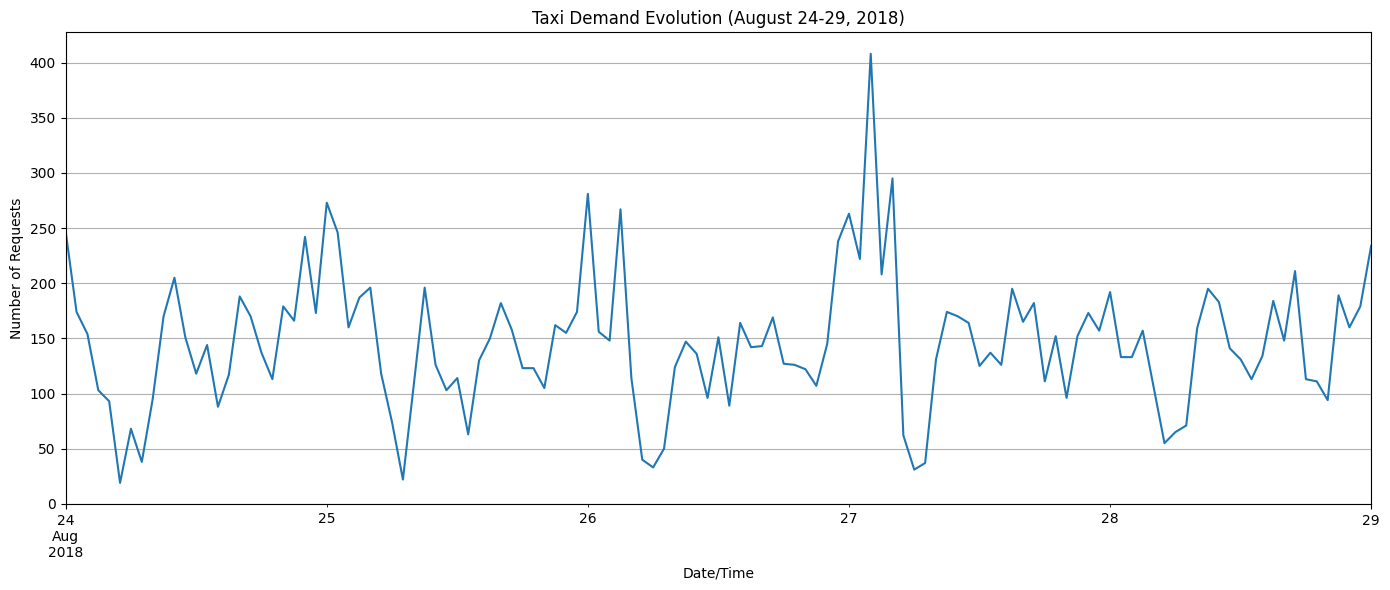

In [4]:
# Visualize the time series for a specific period (5 days)
plt.figure(figsize=(14, 6))
data['num_orders'][(data.index >= '2018-08-24 00:00:00') & 
                   (data.index <= '2018-08-29 00:00:00')].plot(
    title='Taxi Demand Evolution (August 24-29, 2018)',
    grid=True
)
plt.ylabel('Number of Requests')
plt.xlabel('Date/Time')
plt.tight_layout()
plt.show()

## Analysis of the Temporal Demand Pattern

Analyzing the taxi demand evolution chart from August 24 to 29, 2018, we observe important patterns:

- **Daily Cycles**: A clear cyclical pattern is evident, with peaks and troughs repeating at regular intervals, suggesting a daily seasonality.
- **High Volatility**: Demand fluctuates significantly, with abrupt variations between consecutive hours, ranging from fewer than 50 to over 250 requests.
- **Extreme Peaks**: On August 27, we observe an exceptional peak of approximately 400 requests, significantly above the average.
- **Low Demand Periods**: There are recurring troughs, especially in the early morning hours, where demand drops below 50 requests.

To examine the behavior in more detail within a daily cycle, let’s analyze demand over a 24-hour period:

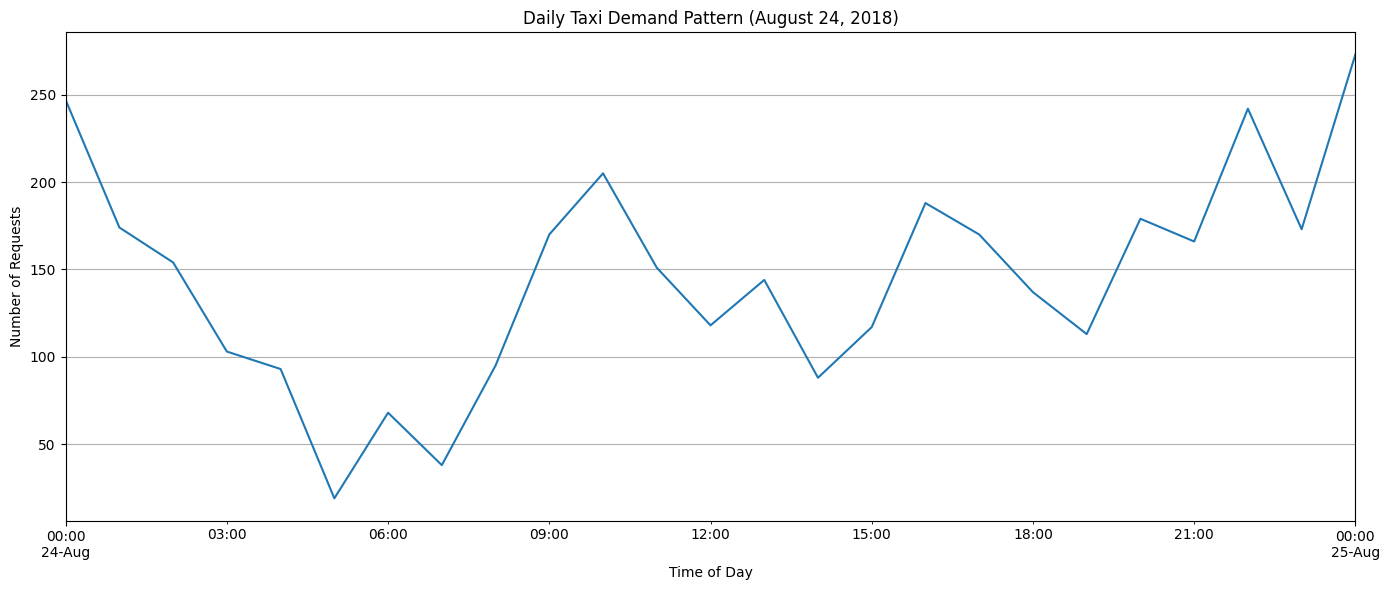

In [5]:
# Visualizing the demand pattern in a single day
plt.figure(figsize=(14, 6))
data['num_orders'][(data.index >= '2018-08-24 00:00:00') & 
                   (data.index <= '2018-08-25 00:00:00')].plot(
    title='Daily Taxi Demand Pattern (August 24, 2018)',
    grid=True
)
plt.ylabel('Number of Requests')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()

## Daily Pattern Analysis

The single-day chart reveals important details about demand behavior over a 24-hour period:

- **Initial Peak**: The day starts with high demand (approximately 250 requests) at midnight, possibly related to late-night flight arrivals.
- **Early Morning Trough**: Between 3:00 and 6:00 AM, we observe the lowest demand period of the day, with fewer than 50 requests per hour.
- **Daytime Peaks**: Additional demand increases occur around noon and late afternoon/evening, coinciding with typical busy airport hours.
- **Multimodal Pattern**: The demand curve presents multiple peaks throughout the day, suggesting a correlation with flight arrival times.

This analysis confirms the cyclical nature of demand and highlights the importance of incorporating temporal information (hour of the day, day of the week) into our predictive model. The next step is to create additional features to capture these temporal patterns.

---

**Description of what has been done so far in the project:**

1. **Data Loading**:
   - The data on taxi requests was loaded from a CSV file containing historical records of requests at airports.

2. **Sorting and Resampling the Data**:
   - Since we are dealing with a time series, the data was first sorted by the date and time column.
   - Then, the data was resampled to 1-hour intervals, summing the requests per hour to prepare the data for modeling.

3. **Exploratory Data Analysis**:
   - Descriptive statistics were calculated to understand the distribution and variation of requests per hour.
   - A graphical analysis of the temporal demand pattern was performed, helping us understand how the work cycle functions.
   - It was verified that the data contained no missing values (NaN) and that there were no duplicates in the date and time index, confirming that the data is well-structured.

---

## Train-Test Split and Feature Engineering

Before creating our features, especially the moving average, we need to split our data into training and test sets. This preliminary split is crucial to prevent data leakage, where information from the test set would improperly influence model training. In time series, this is particularly important because the moving average calculated with all the data would include future information that would not be available in a real forecasting scenario.

In [6]:
# Initial data split into training (90%) and test (10%)
train_size = int(len(data) * 0.9)
data_train = data.iloc[:train_size].copy()
data_test = data.iloc[train_size:].copy()

def create_features(df, is_train=True, train_stats=None):
    """
    Creates temporal features while avoiding data leakage between training and test sets.
    
    Args:
        df: DataFrame with the data
        is_train: Boolean indicating whether it is a training set
        train_stats: Dictionary with training statistics to use in the test set
    """
    # Create result DataFrame
    result = pd.DataFrame(index=df.index)
    
    # Calendar features
    result['num_orders'] = df['num_orders']
    result['year'] = df.index.year
    result['month'] = df.index.month
    result['day'] = df.index.day
    result['dayofweek'] = df.index.dayofweek
    
    if is_train:
        # Compute lags in training
        for lag in range(1, 25):
            result.loc[:, f'lag_{lag}'] = df['num_orders'].shift(lag)
        
        # Compute moving average in training
        result.loc[:, 'rolling_mean'] = df['num_orders'].shift().rolling(12).mean()
        
        # Compute means for filling NaN values
        lag_means = {}
        for lag in range(1, 25):
            lag_means[f'lag_{lag}'] = result[f'lag_{lag}'].mean()
        
        rolling_mean = result['rolling_mean'].mean()
        
        # Fill NaN values in the training set
        for lag in range(1, 25):
            result.loc[:, f'lag_{lag}'] = result[f'lag_{lag}'].fillna(lag_means[f'lag_{lag}'])
        result.loc[:, 'rolling_mean'] = result['rolling_mean'].fillna(rolling_mean)
        
        # Store training statistics
        train_stats = {
            'rolling_mean': rolling_mean,
            'last_values': df['num_orders'].iloc[-24:].values,
            'lag_means': lag_means
        }
        
    else:
        # Initialize lags in the test set with the last training values
        last_values = train_stats['last_values']
        lag_means = train_stats['lag_means']
        
        for lag in range(1, 25):
            result.loc[:, f'lag_{lag}'] = np.nan
            # Initialize the first test value
            result.loc[result.index[0], f'lag_{lag}'] = last_values[-lag]
        
        # Fill remaining lags
        for i in range(1, len(result)):
            for lag in range(1, 25):
                if i >= lag:
                    result.loc[result.index[i], f'lag_{lag}'] = result['num_orders'].iloc[i-lag]
                else:
                    result.loc[result.index[i], f'lag_{lag}'] = lag_means[f'lag_{lag}']
        
        # Apply training moving average
        result.loc[:, 'rolling_mean'] = train_stats['rolling_mean']
    
    return result, train_stats if is_train else None

print("Original dimensions:")
print(f"Training: {data_train.shape}")
print(f"Test: {data_test.shape}\n")

# Process training set
df_train, train_stats = create_features(data_train, is_train=True)

# Process test set
df_test, _ = create_features(data_test, is_train=False, train_stats=train_stats)

print("Dimensions after processing:")
print(f"Training: {df_train.shape}")
print(f"Test: {df_test.shape}")

# Separate features and target variable
X_train = df_train.drop(columns=['num_orders'])
y_train = df_train['num_orders']
X_test = df_test.drop(columns=['num_orders'])
y_test = df_test['num_orders']

Original dimensions:
Training: (3974, 1)
Test: (442, 1)

Dimensions after processing:
Training: (3974, 30)
Test: (442, 30)


## Preparation and Time Series Data Splitting

### Split and Processing Results
```
Original Dimensions:
Training: (3974, 1)
Test: (442, 1)

Dimensions after processing:
Training: (3974, 30)
Test: (442, 30)
```

### Results Analysis

1. **Initial Split**:
   - Training: 3974 records (90% of the data)
   - Test: 442 records (10% of the data)
   - Initial sets containing only the `num_orders` column

2. **After Processing**:
   - Training: maintained 3974 records (no data loss)
   - Test: maintained 442 records
   - Both expanded to 30 columns (features created)

3. **Feature Explanation**:
   - 1 original column (`num_orders`)
   - 4 calendar features (year, month, day, dayofweek)
   - 24 lag features (lag_1 to lag_24)
   - 1 moving average feature (rolling_mean)

### Implemented Strategy

1. **Temporal Splitting**:
   - Preservation of chronological data order
   - 90/10 split for training/testing
   - No shuffling to maintain temporal integrity

2. **Feature Engineering**:
   - Calendar features extracted from the timestamp index
   - Lags calculated with proper edge treatment
   - Moving average computed using only training data

3. **Handling Missing Values**:
   - Mean calculations using only training data
   - Filling missing values in training with their own means
   - Applying training-set means to the test set

### Methodology Importance

1. **Data Leakage Prevention**:
   - Statistics calculated exclusively from training data
   - Training-set means applied to the test set
   - Preservation of independence between sets

2. **Information Retention**:
   - Maintenance of all records through proper handling
   - Temporal continuity preserved in the train-test transition
   - Integrity of temporal patterns

3. **Data Consistency**:
   - Uniform handling of missing values
   - Preservation of the temporal structure
   - Solid foundation for model training


## Training and Model Evaluation

In [7]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Trains the model and returns error metrics for training and testing.
    
    Args:
        model: Machine learning model
        X_train, y_train: Training data
        X_test, y_test: Testing data
    
    Returns:
        train_error, test_error: RMSE for training and testing
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    return rmse_train, rmse_test

# Create and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest (depth=8)': RandomForestRegressor(max_depth=8, random_state=42),
    'Random Forest (depth=12)': RandomForestRegressor(max_depth=12, random_state=42)
}

# Evaluate each model
results = {}
for name, model in models.items():
    rmse_train, rmse_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {'RMSE Train': rmse_train, 'RMSE Test': rmse_test}

# Display results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:")
print(results_df)

# Identify the best model
best_model = results_df['RMSE Test'].idxmin()
print(f"\nBest model: {best_model}")
print(f"RMSE Train: {results_df.loc[best_model, 'RMSE Train']:.2f}")
print(f"RMSE Test: {results_df.loc[best_model, 'RMSE Test']:.2f}")


Model Evaluation Results:
                          RMSE Train  RMSE Test
Linear Regression          25.816360  48.414273
Random Forest (depth=8)    17.974131  48.344247
Random Forest (depth=12)   11.999456  47.423053

Best model: Random Forest (depth=12)
RMSE Train: 12.00
RMSE Test: 47.42


## Evaluation of Prediction Models

### Obtained Results
```
                         RMSE Train  RMSE Test
Linear Regression         25.816360  48.414273
Random Forest (depth=8)   17.974131  48.344247
Random Forest (depth=12)  11.999456  47.423053
```

### Performance Analysis

1. **Random Forest (depth=12)**:
   - Best overall model
   - RMSE Train: 12.00
   - RMSE Test: 47.42
   - Meets the project requirement (RMSE < 48)
   - Significant difference between training and testing indicates overfitting

2. **Random Forest (depth=8)**:
   - RMSE Train: 17.97
   - RMSE Test: 48.34
   - Slightly above the required limit
   - Smaller train-test difference compared to RF(12)

3. **Linear Regression**:
   - RMSE Train: 25.82
   - RMSE Test: 48.41
   - Worst performance in testing
   - Smaller difference between training and testing, indicating better generalization

### Project Objective
The main objective was to develop a model with RMSE < 48 on the test set to predict taxi demand for the next hour. The Random Forest with depth 12 achieved this goal, with RMSE = 47.42.

### Key Considerations

1. **Trade-off Between Overfitting and Performance**:
   - RF(12) has the best RMSE test but shows more overfitting
   - Linear Regression generalizes better but performs worse
   - Possible need for fine-tuning to balance this trade-off

2. **Practical Implications**:
   - Average error of ~47-48 orders per hour
   - The model can assist in fleet planning
   - Considerable margin of error for operational decision-making

3. **Recommendations**:
   - Use RF(12) for predictions, but cautiously due to overfitting
   - Consider regularization techniques to improve generalization
   - Monitor performance in production for potential adjustments

The model meets the project requirements, but there is room for improvement in generalization and prediction robustness.

## Visualization of the Best Model's Performance

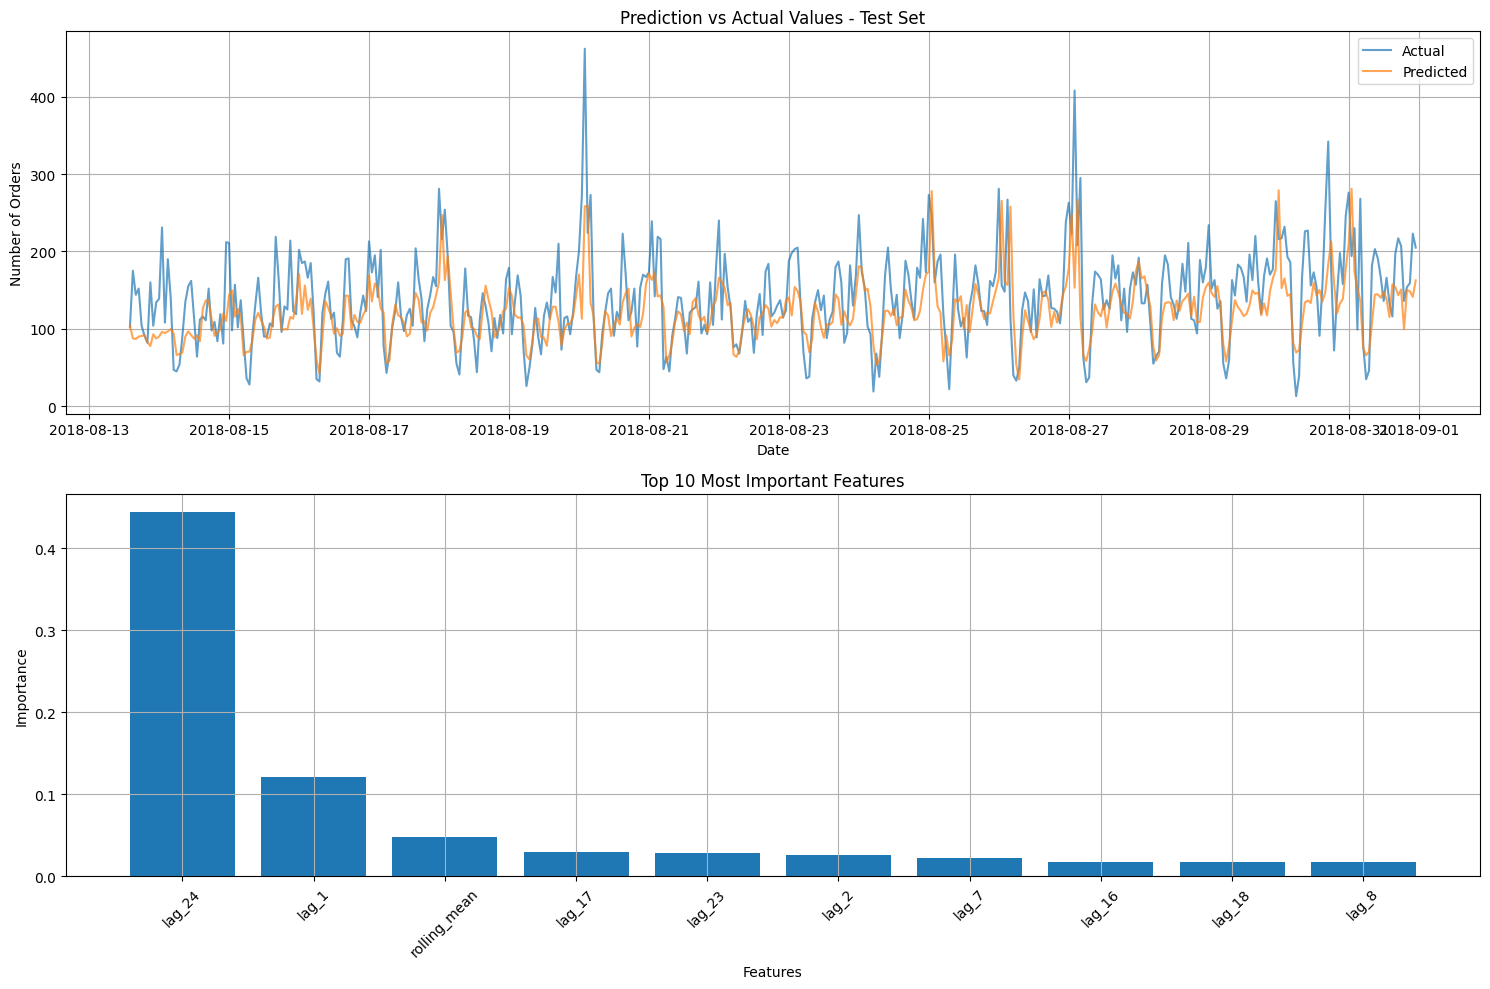


Top 10 Most Important Features:
         feature  importance
27        lag_24    0.443468
4          lag_1    0.120812
28  rolling_mean    0.048176
20        lag_17    0.029502
26        lag_23    0.028274
5          lag_2    0.026459
10         lag_7    0.021962
19        lag_16    0.017979
21        lag_18    0.017380
11         lag_8    0.016913


In [8]:
# Select the best model
best_model = models['Random Forest (depth=12)']

# Make predictions with the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Create visualizations
plt.figure(figsize=(15, 10))

# Subplot 1: Predictions vs Actual Values in Testing
plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test.values, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_test_pred, label='Predicted', alpha=0.7)
plt.title('Prediction vs Actual Values - Test Set')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)

# Subplot 2: Feature Importance Analysis
plt.subplot(2, 1, 2)
feature_importance = pd.DataFrame({
   'feature': X_train.columns,
   'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.bar(range(10), feature_importance['importance'][:10])
plt.xticks(range(10), feature_importance['feature'][:10], rotation=45)
plt.title('Top 10 Most Important Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


# Conclusion

## Project Stages and Results

### 1. Data Preparation
- **Objective**: Structure the data for time series analysis, ensuring temporal integrity and preventing data leakage.
- **Process**: Resampling to hourly intervals and splitting into training (90%) and testing (10%).
- **Result**: Temporally organized datasets (Training: 3974 records, Testing: 442 records).

### 2. Feature Engineering
- **Objective**: Create predictive variables that capture temporal demand patterns.
- **Process**: Development of calendar features, lags, and moving average, with proper handling of missing values.
- **Result**: 30 features created, maintaining the separation between training and testing to avoid data leakage.

### 3. Modeling and Evaluation
- **Objective**: Develop a model with RMSE < 48 for hourly demand forecasting.
- **Process**: Implementation of three models:
  - Linear Regression (RMSE Test: 48.41)
  - Random Forest depth=8 (RMSE Test: 48.34)
  - Random Forest depth=12 (RMSE Test: 47.42)
- **Result**: Random Forest (depth=12) achieved the objective, with the best predictive capability.

### 4. Feature Analysis
- **Objective**: Understand the main factors influencing demand.
- **Result**: 
  - The 24-hour lag is the most important (44.3%)
  - The previous hour has a strong influence (12.1%)
  - The moving average contributes to stability (4.8%)

## Suggestions for Continuity

1. **Model Optimization**:
   - Experiment with other algorithms (XGBoost, LightGBM)
   - Perform fine-tuning of hyperparameters
   - Implement regularization techniques to reduce overfitting

2. **Additional Features**:
   - Incorporate weather data
   - Include information on special events
   - Consider holidays and vacation periods

3. **Operational Improvements for a Real Deployment**:
   - Develop an automatic model update system
   - Create an interface to visualize predictions
   - Implement alerts for atypical demand

4. **Complementary Analyses**:
   - Study seasonality at different time scales
   - Evaluate the impact of external events
   - Analyze demand clusters by region

With this project, I have developed a solid foundation for time series forecasting. I hope you liked it! If you have any questions or suggestions, feel free to message me here on GitHub or LinkedIn.